# Category 3 - Cats vs Dogs 분류

* Convolution Neural network 활용한 분류 모델 (Classification)
* tensorflow-datasets 를 활용한 데이터 전처리

Computer Vision with CNNs
<br>
<br>For this exercise you will build a cats v dogs classifier
<br>using the Cats v Dogs dataset from TFDS.
<br>Be sure to use the final layer as shown 
<br>    **(Dense, 2 neurons, softmax activation)**
<br>
<br>The testing infrastructre will **resize all images to 224x224**
<br>with **3 bytes of color depth**. Make sure your input layer trains
<br>images to that specification, or the tests will fail.
<br>
<br>Make sure your output layer is exactly as specified here, or the 
<br>tests will fail.

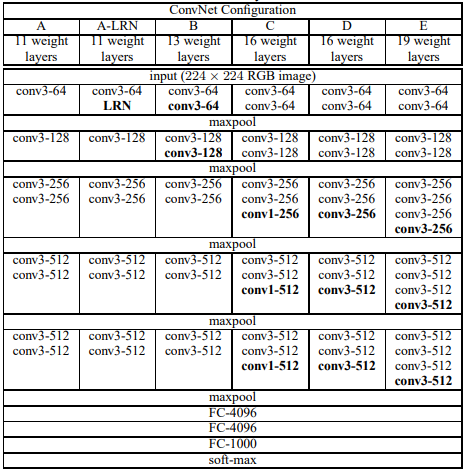

# 1. import

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16

# 2. Load dataset

In [3]:
dataset_name = 'cats_vs_dogs'

train_dataset = tfds.load(name=dataset_name, split='train[:80%]')
valid_dataset = tfds.load(name=dataset_name, split='train[80%:]')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete2LCLRZ/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [4]:
def preprocess(data):
  x = data['image']
  y = data['label']

  # normalization
  x = x / 255

  # resize (224, 224)
  x = tf.image.resize(x, size=(224, 224))

  return x, y

In [5]:
batch_size = 32

train_data = train_dataset.map(preprocess).batch(batch_size)
valid_data = valid_dataset.map(preprocess).batch(batch_size)

# 3. 모델 정의 (Sequential)

1. `input_shape`는 224 X 224 컬러사진인 **(224, 224, 3)**으로 지정합니다.
2. transfer learning 기법을 통해 VGG16 모델을 활용한 전이학습 모델을 완성합니다.
3. 출력층은 class 갯수 2개의 뉴런이 요구됩니다.

In [6]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer_model.trainable = False  # weights freeze

58900480/58889256 [==============================] - 0s 0us/step


In [7]:
model = Sequential([
                    transfer_model,
                    Flatten(),
                    Dropout(0.5),
                    Dense(512, activation='relu'),
                    Dense(216, activation='relu'),
                    Dense(2, activation='softmax')
])

# 4. Compile

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# 5. ModelCheckpoint

In [11]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

# 6. fit

In [12]:
model.fit(train_data,
          validation_data=(valid_data),
          epochs=10,
          callbacks=[checkpoint])

Epoch 1/10
582/582 [==============================] - 139s 177ms/step - loss: 0.2818 - acc: 0.8880 - val_loss: 0.1687 - val_acc: 0.9286

Epoch 00001: val_loss improved from inf to 0.16874, saving model to my_checkpoint.ckpt
Epoch 2/10
582/582 [==============================] - 98s 167ms/step - loss: 0.1799 - acc: 0.9232 - val_loss: 0.1891 - val_acc: 0.9233

Epoch 00002: val_loss did not improve from 0.16874
Epoch 3/10
582/582 [==============================] - 97s 167ms/step - loss: 0.1593 - acc: 0.9345 - val_loss: 0.1645 - val_acc: 0.9299

Epoch 00003: val_loss improved from 0.16874 to 0.16450, saving model to my_checkpoint.ckpt
Epoch 4/10
582/582 [==============================] - 98s 167ms/step - loss: 0.1433 - acc: 0.9400 - val_loss: 0.1838 - val_acc: 0.9269

Epoch 00004: val_loss did not improve from 0.16450
Epoch 5/10
582/582 [==============================] - 97s 167ms/step - loss: 0.1410 - acc: 0.9420 - val_loss: 0.1765 - val_acc: 0.9347

Epoch 00005: val_loss did not improve f

# 7. Load Weights

In [13]:
model.load_weights(checkpoint_path)